# SML 301

## Session 6: Decision Trees

* decision tree classifiers
* decision tree boundaries
* preprocessing: one-hot encoding, standard scalar

In [51]:
# install packages (if need be)
#%pip install palmerpenguins

We will explore the `palmerpenguins` data set (https://allisonhorst.github.io/palmerpenguins/)

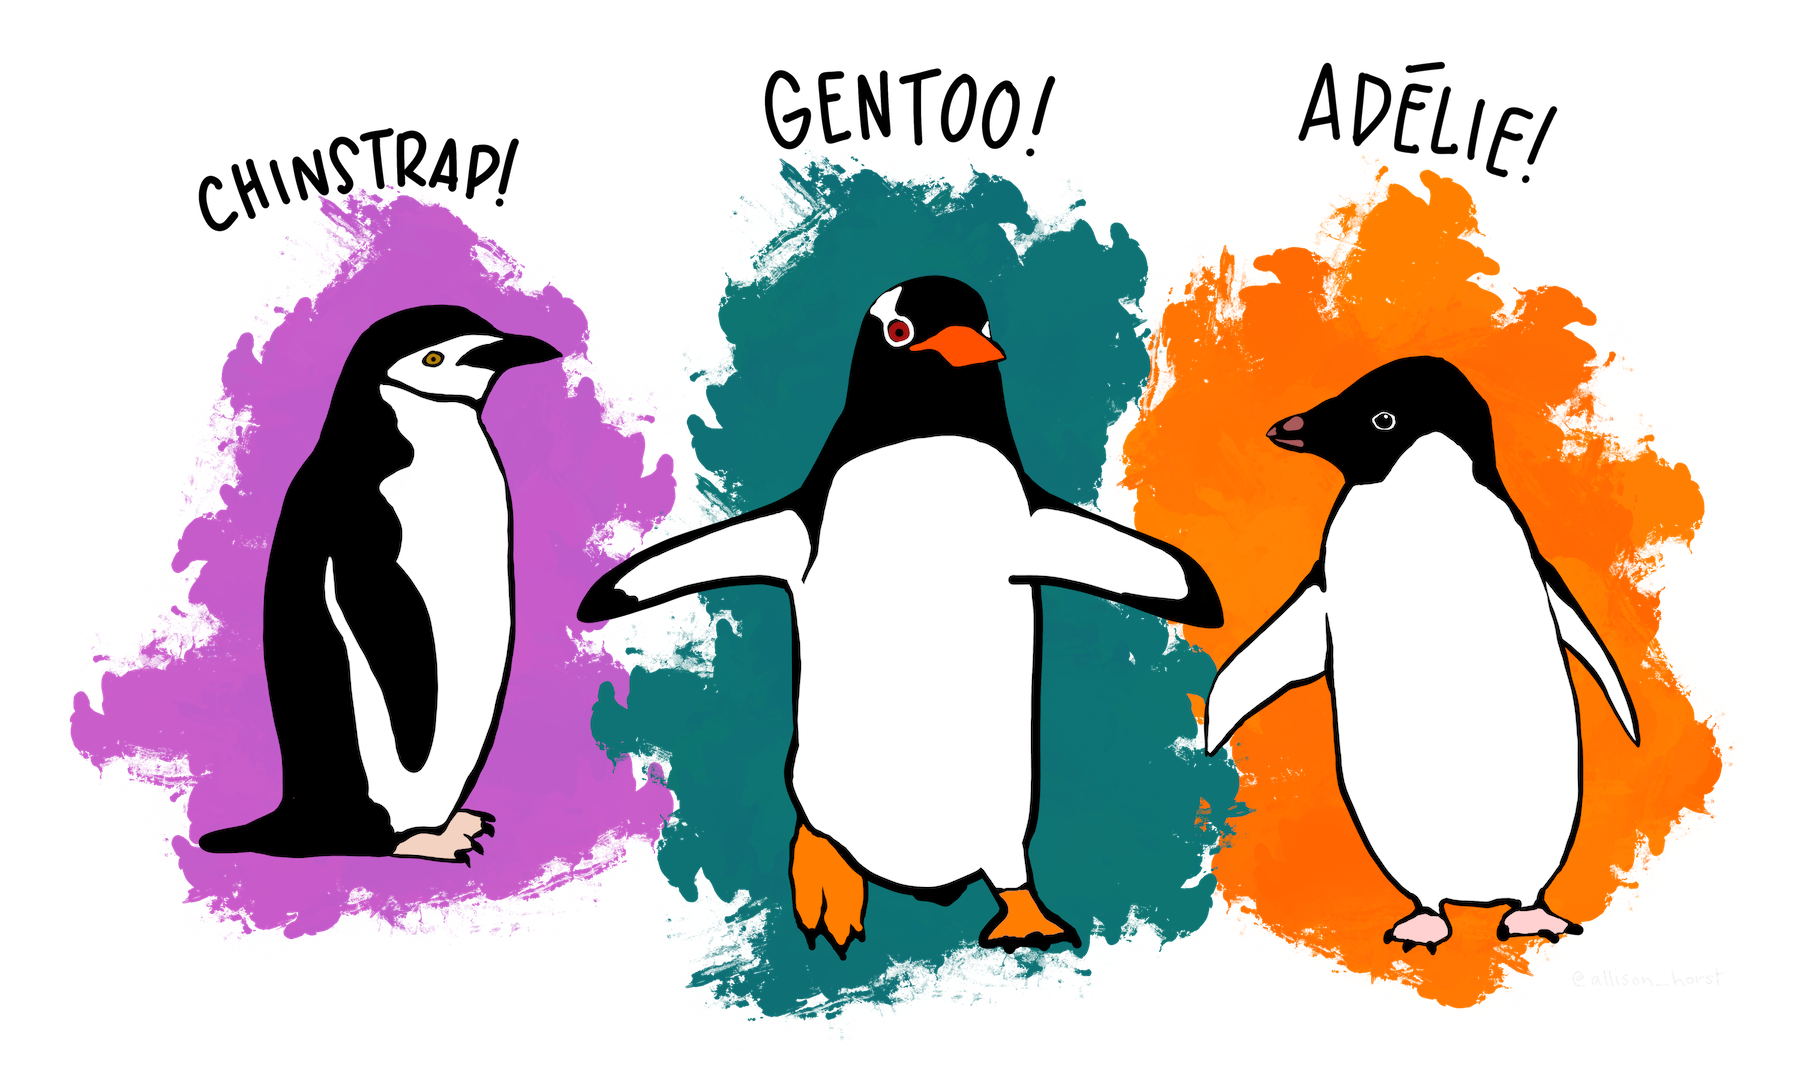

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree

from matplotlib.pyplot import subplots
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

penguins = load_penguins()

# Example 1: body mass and bill depth

Can we predict the `species` of a penguin using the rest of the data?

* response variable ($y$): `species`
* predictor variables ($X$): `bill_length_mm`, `bill_depth_mm`, etc.

In [74]:
df = penguins[['species', 'bill_depth_mm', 'body_mass_g']] #load in needed columns
df = df.dropna() #then remove missing data
X = df[['bill_depth_mm', 'body_mass_g']] #explanatory variables
y = df['species'] #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 301)

In [75]:
tree_maker = DTC(criterion='entropy', max_depth = 3, random_state = 301)
tree_model = tree_maker.fit(X_train, y_train)
accuracy_train = tree_model.score(X_train, y_train)
accuracy_test  = tree_model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.4f}')
print(f'test accuracy : {accuracy_test:.4f}')

train accuracy: 0.8075
test accuracy : 0.7476


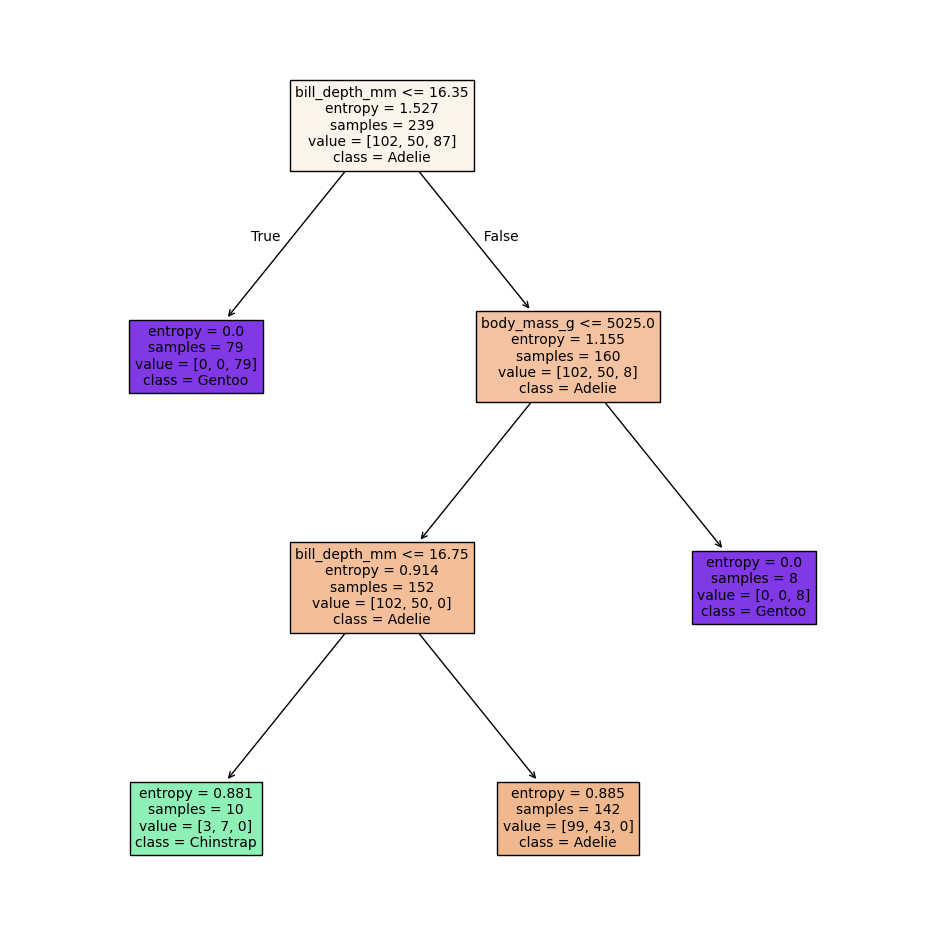

In [76]:
ax = subplots(figsize=(12,12))[1]
tree.plot_tree(tree_model, filled = True, class_names = tree_model.classes_, feature_names = X.columns, fontsize= 10)
plt.show()

# Example 2: flipper length and bill length

In [77]:
df = penguins[['species', 'flipper_length_mm', 'bill_length_mm']] #load in needed columns
df = df.dropna() #then remove missing data
X = df[['flipper_length_mm', 'bill_length_mm']] #explanatory variables
y = df['species'] #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 301)

In [78]:
tree_maker = DTC(criterion='entropy', max_depth = 3, random_state = 301)
tree_model = tree_maker.fit(X_train, y_train)
accuracy_train = tree_model.score(X_train, y_train)
accuracy_test  = tree_model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.4f}')
print(f'test accuracy : {accuracy_test:.4f}')

train accuracy: 0.9540
test accuracy : 0.9612


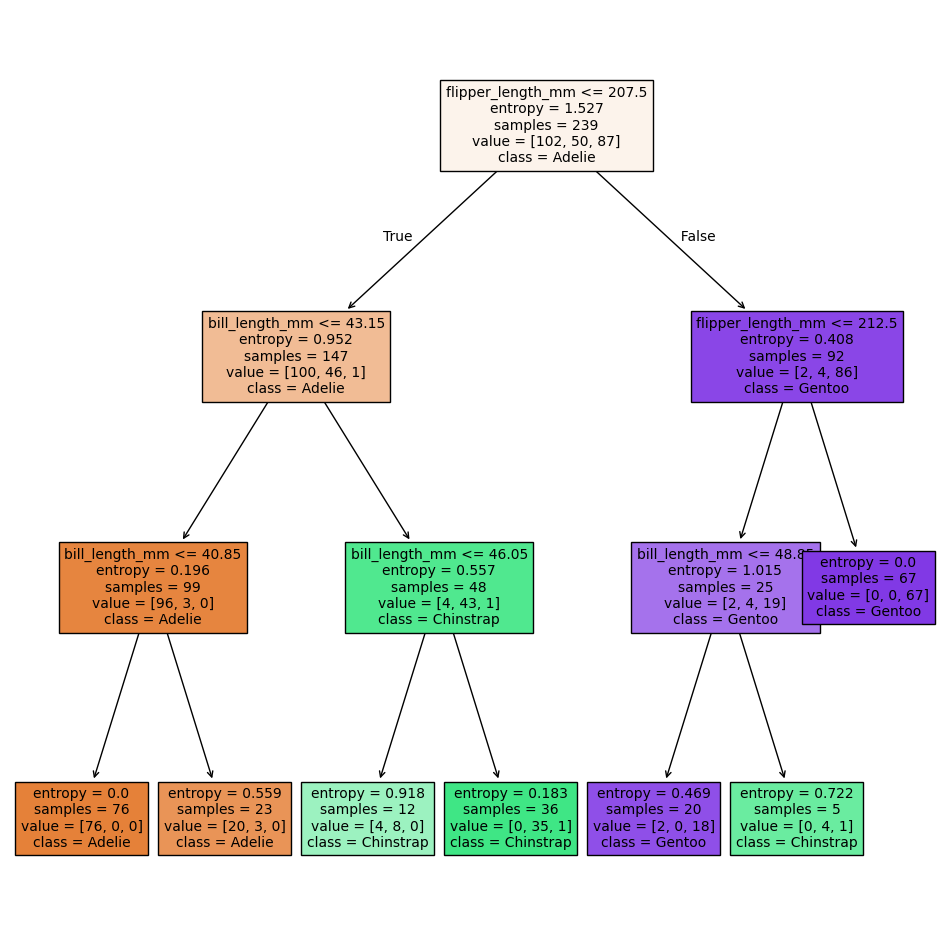

In [79]:
ax = subplots(figsize=(12,12))[1]
tree.plot_tree(tree_model, filled = True, class_names = tree_model.classes_, feature_names = X.columns, fontsize= 10)
plt.show()

## Example 3: all numerical predictors, more depth

In [81]:
df = penguins[['species', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm']] #load in needed columns
df = df.dropna() #then remove missing data
X = df[['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm']] #explanatory variables
y = df['species'] #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 301)

In [82]:
tree_maker = DTC(criterion='entropy', max_depth = 5, random_state = 301)
tree_model = tree_maker.fit(X_train, y_train)
accuracy_train = tree_model.score(X_train, y_train)
accuracy_test  = tree_model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.4f}')
print(f'test accuracy : {accuracy_test:.4f}')

train accuracy: 0.9958
test accuracy : 0.9903


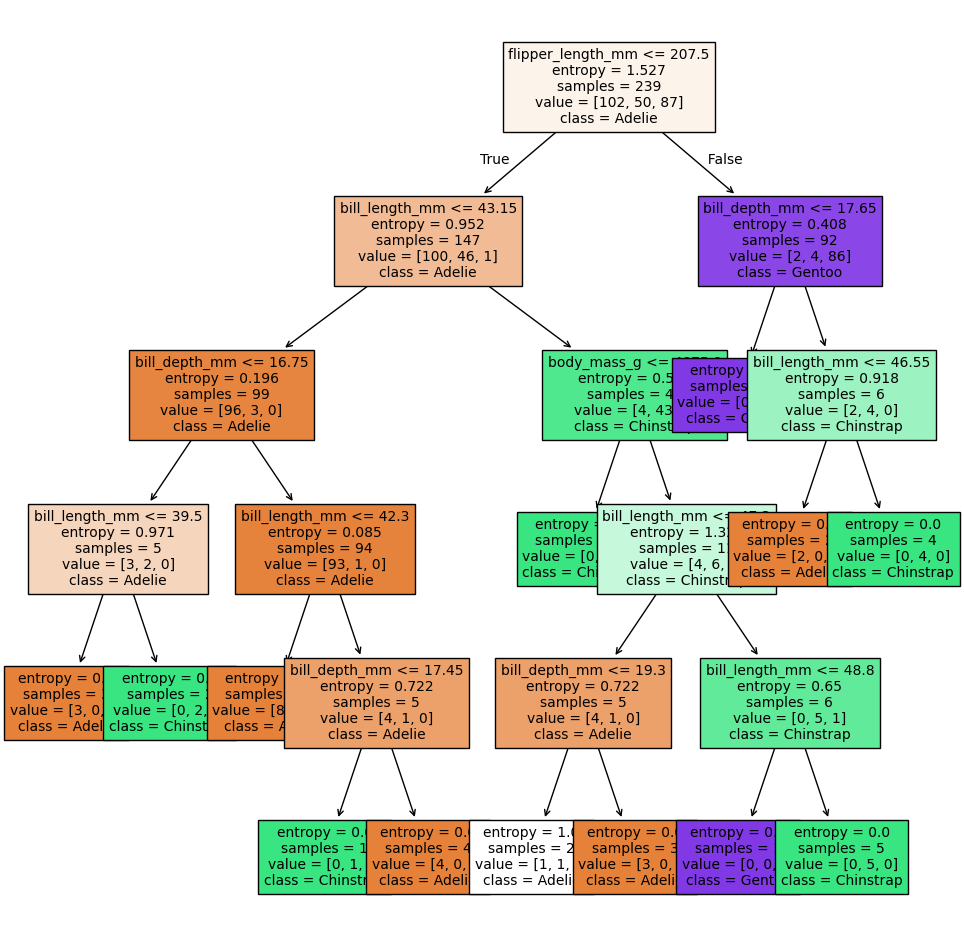

In [83]:
ax = subplots(figsize=(12,12))[1]
tree.plot_tree(tree_model, filled = True, class_names = tree_model.classes_, feature_names = X.columns, fontsize= 10)
plt.show()

# Example 4: allow all depth?

In [ ]:
tree_maker = DTC(criterion='entropy', random_state = 301) #removed max_depth
tree_model = tree_maker.fit(X_train, y_train)
accuracy_train = tree_model.score(X_train, y_train)
accuracy_test  = tree_model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.4f}') #perfect fit?
print(f'test accuracy : {accuracy_test:.4f}')

train accuracy: 1.0000
test accuracy : 0.9709


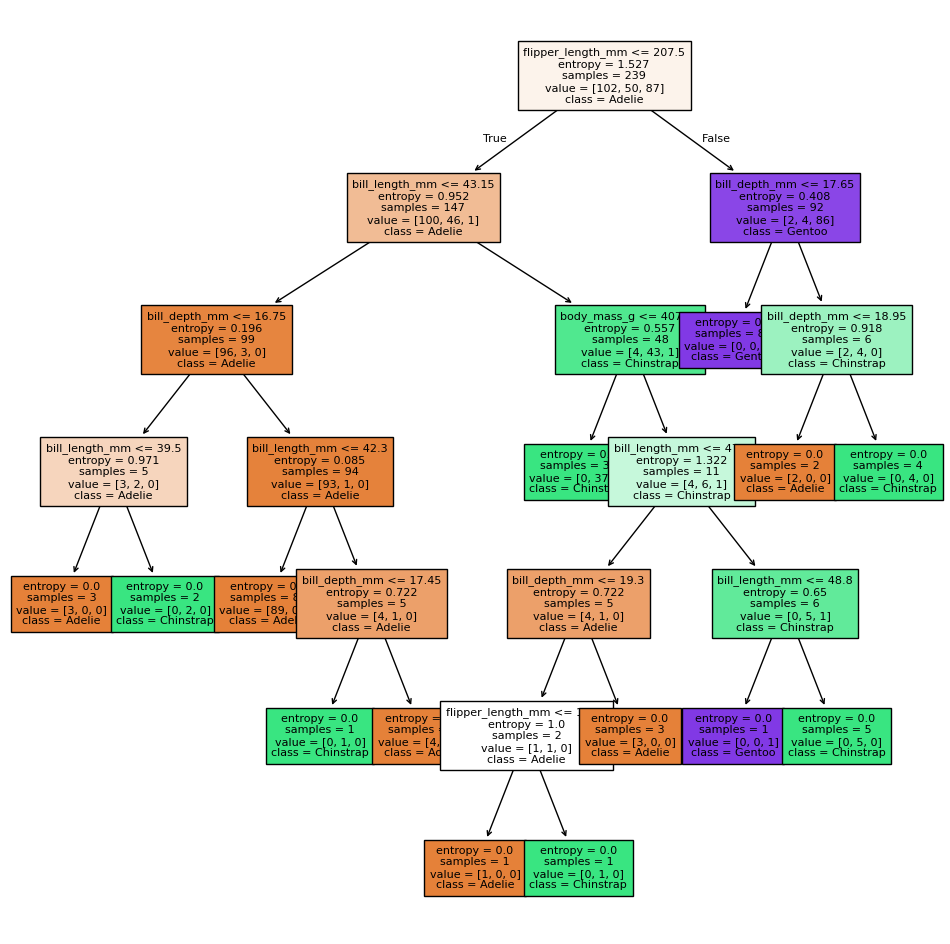

In [88]:
ax = subplots(figsize=(12,12))[1]
tree.plot_tree(tree_model, filled = True, class_names = tree_model.classes_, feature_names = X.columns, fontsize= 8)
plt.show()

# Using Categorical Variables

In [56]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [57]:
df = penguins.dropna()
X = df.drop('species', axis = 1) #explanatory variables
y = df['species'] #target variable
X_num = X.select_dtypes(include = 'number')
X_cat = X.select_dtypes(include = 'object') #some recommend recasting as 'category'
print(X_num.dtypes)
print(X_cat.dtypes)

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
year                   int64
dtype: object
island    object
sex       object
dtype: object


## Label Encoding

In [58]:
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
X_cat_label = pd.DataFrame({col: X_cat[col].astype('category').cat.codes for col in X_cat}, index=X_cat.index)
print(X_cat.head())
print(X_cat_label.head())

# caution: if you actually have ordinal data (e.g. Likert Scale), replace the column with a dictionary of values instead

      island     sex
0  Torgersen    male
1  Torgersen  female
2  Torgersen  female
4  Torgersen  female
5  Torgersen    male
   island  sex
0       2    1
1       2    0
2       2    0
4       2    0
5       2    1


## One-Hot Encoding

In [59]:
X_cat_csr = OneHotEncoder().fit_transform(X_cat)
X_cat_hot = pd.DataFrame.sparse.from_spmatrix(X_cat_csr)
X_cat_hot.columns = OneHotEncoder().fit(X_cat).get_feature_names_out()
print(X_cat.head())
print(X_cat_hot.head())

      island     sex
0  Torgersen    male
1  Torgersen  female
2  Torgersen  female
4  Torgersen  female
5  Torgersen    male
   island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male
0              0             0               1.0           0       1.0
1              0             0               1.0         1.0         0
2              0             0               1.0         1.0         0
3              0             0               1.0         1.0         0
4              0             0               1.0           0       1.0


# Rescaling Numerical Data

## MinMax Scalar

In [60]:
X_num_MM = MinMaxScaler().fit_transform(X_num)
X_num_MM = pd.DataFrame(X_num_MM, columns = X_num.columns)
print(X_num.head())
print(X_num_MM.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0            39.1           18.7              181.0       3750.0  2007
1            39.5           17.4              186.0       3800.0  2007
2            40.3           18.0              195.0       3250.0  2007
4            36.7           19.3              193.0       3450.0  2007
5            39.3           20.6              190.0       3650.0  2007
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0        0.254545       0.666667           0.152542     0.291667   0.0
1        0.269091       0.511905           0.237288     0.305556   0.0
2        0.298182       0.583333           0.389831     0.152778   0.0
3        0.167273       0.738095           0.355932     0.208333   0.0
4        0.261818       0.892857           0.305085     0.263889   0.0


## Standard Scalar

In [61]:
X_num_std = StandardScaler().fit_transform(X_num)
X_num_std = pd.DataFrame(X_num_std, columns = X_num.columns)
print(X_num.head())
print(X_num_std.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0            39.1           18.7              181.0       3750.0  2007
1            39.5           17.4              186.0       3800.0  2007
2            40.3           18.0              195.0       3250.0  2007
4            36.7           19.3              193.0       3450.0  2007
5            39.3           20.6              190.0       3650.0  2007
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g      year
0       -0.896042       0.780732          -1.426752    -0.568475 -1.283742
1       -0.822788       0.119584          -1.069474    -0.506286 -1.283742
2       -0.676280       0.424729          -0.426373    -1.190361 -1.283742
3       -1.335566       1.085877          -0.569284    -0.941606 -1.283742
4       -0.859415       1.747026          -0.783651    -0.692852 -1.283742


# Transformed Data

In [62]:
X_before = X
X = pd.concat([X_num_std, X_cat_hot], axis = 1)
print(X_before.head())
print(X.head())

      island  bill_length_mm  bill_depth_mm  ...  body_mass_g     sex  year
0  Torgersen            39.1           18.7  ...       3750.0    male  2007
1  Torgersen            39.5           17.4  ...       3800.0  female  2007
2  Torgersen            40.3           18.0  ...       3250.0  female  2007
4  Torgersen            36.7           19.3  ...       3450.0  female  2007
5  Torgersen            39.3           20.6  ...       3650.0    male  2007

[5 rows x 7 columns]
   bill_length_mm  bill_depth_mm  ...  sex_female  sex_male
0       -0.896042       0.780732  ...           0       1.0
1       -0.822788       0.119584  ...         1.0         0
2       -0.676280       0.424729  ...         1.0         0
3       -1.335566       1.085877  ...         1.0         0
4       -0.859415       1.747026  ...           0       1.0

[5 rows x 10 columns]


# Example: all predictors, now with categorical data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 301)

In [64]:
tree_maker = DTC(criterion='entropy', max_depth = 3, random_state = 301)
tree_model = tree_maker.fit(X_train, y_train)
accuracy_train = tree_model.score(X_train, y_train)
accuracy_test  = tree_model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.4f}')
print(f'test accuracy : {accuracy_test:.4f}')

train accuracy: 0.9957
test accuracy : 0.9600


C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


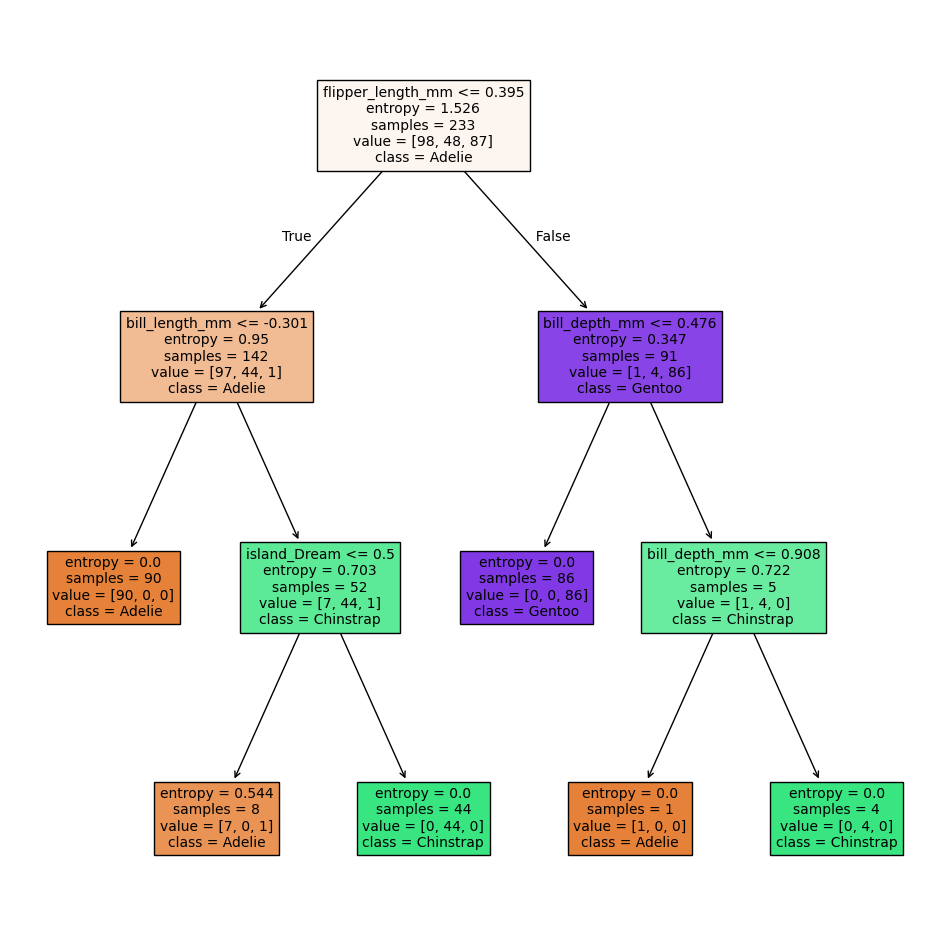

In [65]:
ax = subplots(figsize=(12,12))[1]
tree.plot_tree(tree_model, filled = True, class_names = tree_model.classes_, feature_names = X.columns, fontsize= 10)
plt.show()

# Decision Tree Regressor

* response variable: `bill_length_mm`
* explanatory variables: `island`, `body_mass_g`, `flipper_length_mm`, `sex`

In [66]:
df = penguins[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'island', 'sex']] #load in needed columns
df = df.dropna() #then remove missing data
X = df[['body_mass_g', 'flipper_length_mm', 'island', 'sex']] #explanatory variables
y = df['bill_length_mm'] #target variable

X_num = X.select_dtypes(include = 'number')
X_cat = X.select_dtypes(include = 'object') #some recommend recasting as 'category'

X_cat_csr = OneHotEncoder().fit_transform(X_cat)
X_cat_hot = pd.DataFrame.sparse.from_spmatrix(X_cat_csr)
X_cat_hot.columns = OneHotEncoder().fit(X_cat).get_feature_names_out()

X_num_std = StandardScaler().fit_transform(X_num)
X_num_std = pd.DataFrame(X_num_std, columns = X_num.columns)

X = pd.concat([X_num_std, X_cat_hot], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 301)

In [ ]:
tree_maker = DTR(criterion='friedman_mse', max_depth = 3, random_state = 301)
tree_model = tree_maker.fit(X_train, y_train)
R2_train = tree_model.score(X_train, y_train) #coefficient of determination
R2_test  = tree_model.score(X_test, y_test)
print(f'train R2: {R2_train:.4f}')
print(f'test R2 : {R2_test:.4f}')

train R2: 0.5869
test R2 : 0.4848


C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


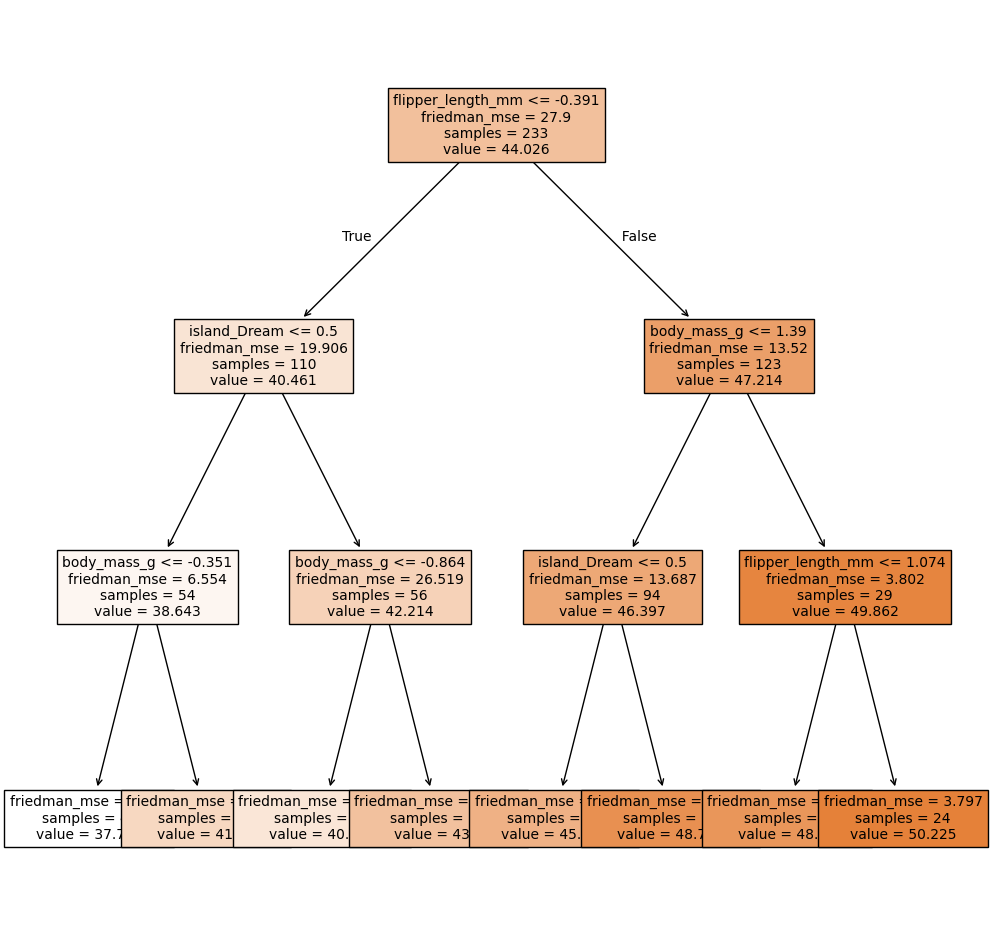

In [72]:
ax = subplots(figsize=(12,12))[1]
tree.plot_tree(tree_model, filled = True, feature_names = X.columns, fontsize= 10)
plt.show()

In [ ]:
tree_maker = DTR(criterion='friedman_mse', max_depth = 20, random_state = 301)
tree_model = tree_maker.fit(X_train, y_train)
R2_train = tree_model.score(X_train, y_train)
R2_test  = tree_model.score(X_test, y_test)
print(f'train R2: {R2_train:.4f}')
print(f'test R2 : {R2_test:.4f}') #overfitting!

train R2: 0.9899
test R2 : 0.2770


C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\freex\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
